# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1





print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : carnarvon
Processing Record 2 of Set 1 : rikitea
City not found. Skipping...
Processing Record 3 of Set 1 : upernavik
Processing Record 4 of Set 1 : hilo
Processing Record 5 of Set 1 : busselton
Processing Record 6 of Set 1 : college
Processing Record 7 of Set 1 : cape town
Processing Record 8 of Set 1 : tsabong
Processing Record 9 of Set 1 : ribeira grande
Processing Record 10 of Set 1 : arraial do cabo
Processing Record 11 of Set 1 : iqaluit
Processing Record 12 of Set 1 : jieshi
City not found. Skipping...
Processing Record 13 of Set 1 : almansa
Processing Record 14 of Set 1 : natal
Processing Record 15 of Set 1 : mataura
City not found. Skipping...
Processing Record 16 of Set 1 : buala
City not found. Skipping...
Processing Record 17 of Set 1 : avarua
Processing Record 18 of Set 1 : rio verde de mato grosso
Processing Record 19 of Set 1 : lorengau
Processing Record 20 of Set 1 : albanel
City not 

Processing Record 33 of Set 4 : teknaf
Processing Record 34 of Set 4 : hammerfest
Processing Record 35 of Set 4 : tuktoyaktuk
Processing Record 36 of Set 4 : tiksi
Processing Record 37 of Set 4 : rock sound
Processing Record 38 of Set 4 : seoul
Processing Record 39 of Set 4 : jaisinghnagar
Processing Record 40 of Set 4 : chilca
Processing Record 41 of Set 4 : general roca
Processing Record 42 of Set 4 : saint-louis
Processing Record 43 of Set 4 : tanggu
Processing Record 44 of Set 4 : concepcion
Processing Record 45 of Set 4 : tevaitoa
Processing Record 46 of Set 4 : eureka
Processing Record 47 of Set 4 : haines junction
Processing Record 48 of Set 4 : berlevag
Processing Record 49 of Set 4 : takoradi
Processing Record 50 of Set 4 : nikolskoye
Processing Record 0 of Set 5 : karacabey
Processing Record 1 of Set 5 : bonga
Processing Record 2 of Set 5 : east london
Processing Record 3 of Set 5 : daru
Processing Record 4 of Set 5 : esperance
Processing Record 5 of Set 5 : broken hill
Proce

Processing Record 18 of Set 8 : yantal
City not found. Skipping...
Processing Record 19 of Set 8 : linxia
Processing Record 20 of Set 8 : ambilobe
Processing Record 21 of Set 8 : the pas
City not found. Skipping...
Processing Record 22 of Set 8 : sabha
Processing Record 23 of Set 8 : itaituba
Processing Record 24 of Set 8 : lodingen
Processing Record 25 of Set 8 : rocha
Processing Record 26 of Set 8 : alta floresta
City not found. Skipping...
Processing Record 27 of Set 8 : dibulla
Processing Record 28 of Set 8 : hovd
Processing Record 29 of Set 8 : mastic beach
Processing Record 30 of Set 8 : nanortalik
Processing Record 31 of Set 8 : kenai
Processing Record 32 of Set 8 : vanderhoof
Processing Record 33 of Set 8 : kuna
Processing Record 34 of Set 8 : lumby
Processing Record 35 of Set 8 : erenhot
Processing Record 36 of Set 8 : hirado
Processing Record 37 of Set 8 : chapais
Processing Record 38 of Set 8 : flinders
Processing Record 39 of Set 8 : huilong
Processing Record 40 of Set 8 : 

Processing Record 0 of Set 12 : zhovti vody
Processing Record 1 of Set 12 : zhezkazgan
City not found. Skipping...
Processing Record 2 of Set 12 : benguela
Processing Record 3 of Set 12 : walla walla
Processing Record 4 of Set 12 : roebourne
Processing Record 5 of Set 12 : elmadag
Processing Record 6 of Set 12 : manta
Processing Record 7 of Set 12 : salta
Processing Record 8 of Set 12 : araouane
Processing Record 9 of Set 12 : pizarro
Processing Record 10 of Set 12 : bella union
Processing Record 11 of Set 12 : bikin
Processing Record 12 of Set 12 : poya
Processing Record 13 of Set 12 : verkhnyaya maksakovka
Processing Record 14 of Set 12 : poum
City not found. Skipping...
Processing Record 15 of Set 12 : finschhafen
Processing Record 16 of Set 12 : shebunino
Processing Record 17 of Set 12 : orangeburg
Processing Record 18 of Set 12 : majene
Processing Record 19 of Set 12 : kunmadaras
Processing Record 20 of Set 12 : karratha
Processing Record 21 of Set 12 : port shepstone
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Export city data into a .csv
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


In [10]:
weather_dict.count()

City          583
Cloudiness    583
Country       583
Date          583
Humidity      583
Lat           583
Lng           583
Max Temp      583
Wind Speed    583
dtype: int64

In [11]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,100,AU,1659270962,48,-24.8667,113.6333,70.39,8.32
1,Rikitea,100,PF,1659270963,74,-23.1203,-134.9692,72.37,19.19
2,Upernavik,70,GL,1659270964,69,72.7868,-56.1549,47.97,9.06
3,Hilo,100,US,1659270916,83,19.7297,-155.0900,73.27,4.61
4,Busselton,100,AU,1659270965,74,-33.6500,115.3333,57.49,14.88
...,...,...,...,...,...,...,...,...,...
578,Majene,100,ID,1659271223,88,-3.5403,118.9707,77.76,6.15
579,Kunmadaras,100,HU,1659271223,54,47.4333,20.8000,72.86,13.87
580,Karratha,23,AU,1659271224,59,-20.7377,116.8463,72.05,5.84
581,Port Shepstone,99,ZA,1659271224,57,-30.7414,30.4550,62.92,21.59


In [13]:
# Save city data into a csv file
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

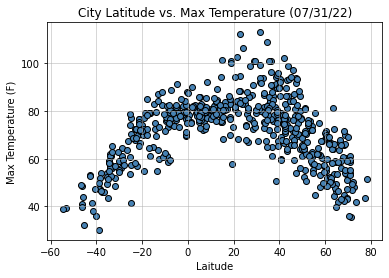

In [17]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (07/31/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

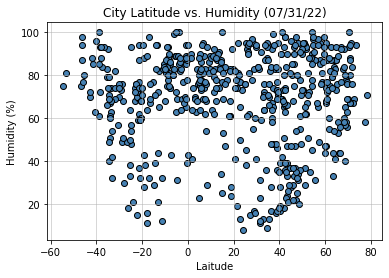

In [18]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (07/31/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

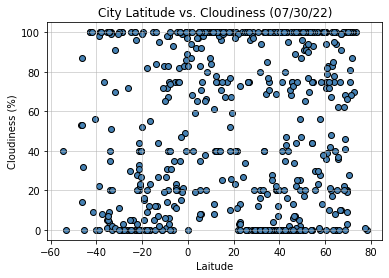

In [20]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (07/30/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

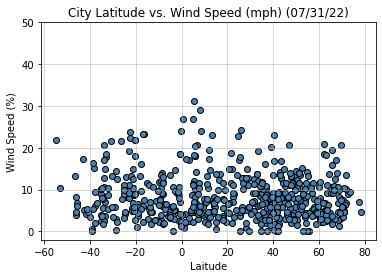

In [21]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (07/31/22)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [33]:

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.63


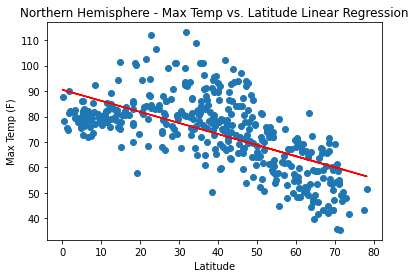

In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]


# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.83


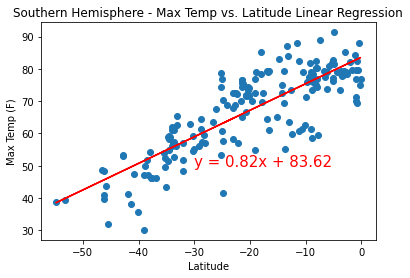

In [35]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0


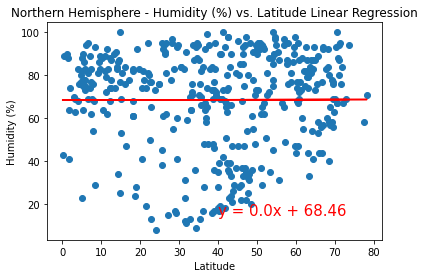

In [36]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.07


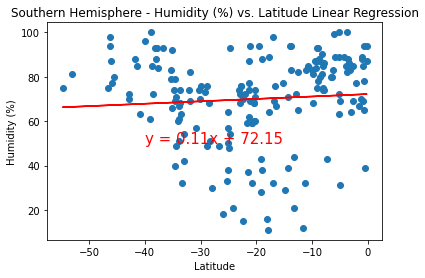

In [37]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.12


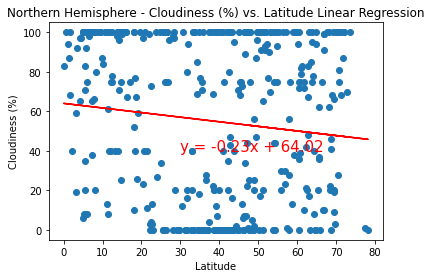

In [38]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


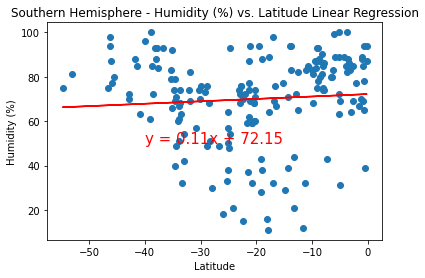

In [39]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.12


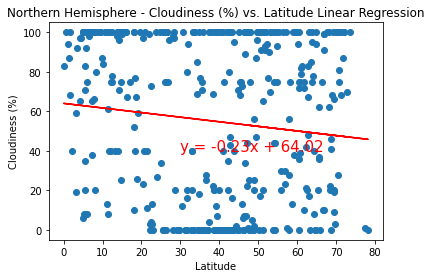

In [40]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07


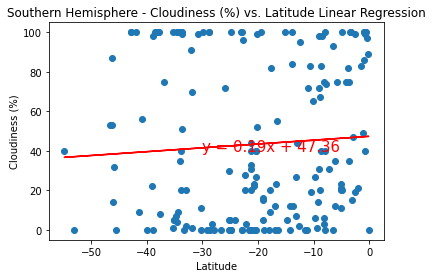

In [41]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")